In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os import listdir, getcwd, chdir
from os.path import isfile, join
from diff_predictor import data_process
#!pip install plotly
import plotly.express as px
from sklearn.preprocessing import scale, StandardScaler
from sklearn.decomposition import PCA

In [12]:
workbookDir = getcwd()
print('Current Notebook Dir: ' + workbookDir)
chdir(workbookDir)
chdir('..')
print(f'Using current directory for loading data: {getcwd()}')
workbookDir = getcwd()

Current Notebook Dir: C:\
Using current directory for loading data: C:\


In [13]:
data_path = 'Users/Keira/Downloads/textile/mpt_data/'
filelist = [f for f in listdir(data_path) if isfile(join(data_path, f)) and 'feat' in f]
len(filelist) #check to make sure there are the right number of files, in this case 15 - five per class

75

In [14]:
fstats_tot.head()

,Track_ID,alpha,D_fit,kurtosis,asymmetry1,asymmetry2,asymmetry3,AR,elongation,boundedness,...,Std convex_hull_norm,Mean dist_tot,Std dist_tot,Mean dist_net,Std dist_net,Mean progression,Std progression,age,Filename,Video Number
0,0.0,0.145892,115.910645,3.051675,0.744942,0.271071,0.179650,1.287207,0.223124,0.157897,...,0.0,25621.753218,10363.797033,1800.021676,64.057425,0.080031,0.025167,P14,features_P14_40nm_s1_v1.csv,0
1,1.0,2.193719,1.611728,3.180184,0.851672,0.200292,0.250967,2.605750,0.616233,0.030720,...,0.0,26835.693671,8364.829289,2312.473896,61.022111,0.093691,0.024171,P14,features_P14_40nm_s1_v1.csv,0
2,2.0,1.649381,12.301497,1.654691,0.989301,0.051857,0.521313,3.210672,0.688539,0.041548,...,0.0,24169.173272,7667.671923,1991.842371,76.548932,0.090450,0.025825,P14,features_P14_40nm_s1_v1.csv,0
3,3.0,0.756172,50.106737,2.428506,0.990430,0.049030,0.529145,3.600695,0.722276,0.128690,...,0.0,24169.173272,7667.671923,1991.842371,76.548932,0.090450,0.025825,P14,features_P14_40nm_s1_v1.csv,0
4,4.0,2.153309,3.674387,2.894523,0.996028,0.031544,0.581089,4.677014,0.786188,0.154286,...,0.0,25686.973833,12240.490368,2002.856919,108.115520,0.091822,0.030371,P14,features_P14_40nm_s1_v1.csv,0


In [15]:
feature_list = [
    'Mean alpha', #fitted anomalos diffusion alpha exponent
    'Mean D_fit', #fitted anomalous diffusion coefficient
    'Mean kurtosis', #kurtosis of track - can show non-linearity in trajectory such as compartmentalization
    'Mean asymmetry1', #asymmetry of trajectory (0 for circular symmetric, 1 for linear)
    'Mean asymmetry2', 
    'Mean asymmetry3', 
    'Mean elongation', #est. of amount of extension of trajectory from centroid
    'Mean boundedness', #how much a particle with Deff is restructed by a circular confinement
    'Mean fractal_dim', #measure of how complicated a self similar figure is
    'Mean efficiency', #ratio of squared net displacement to the sum of squared step lengths
    'Mean straightness', #ratio of net displacement to the sum of squared step lengths
    'Mean MSD_ratio', #MSD ratio of the track
    'Mean Deff1', #effective diffusion coefficient at 0.33 s
    'Mean Deff2' #effective diffusion coefficient at 3.3 s
]

In [16]:
ecm = fstats_tot[feature_list + ['age']]
ecm = ecm[~ecm[list(set(feature_list) - set(['Mean Deff2']))].isin([np.nan, np.inf, -np.inf]).any(1)]
ecm = ecm.fillna(0)
ecm.shape

(38304, 15)

In [17]:
ecm.head()

,Mean alpha,Mean D_fit,Mean kurtosis,Mean asymmetry1,Mean asymmetry2,Mean asymmetry3,Mean elongation,Mean boundedness,Mean fractal_dim,Mean efficiency,Mean straightness,Mean MSD_ratio,Mean Deff1,Mean Deff2,age
0,0.794160,44.383932,2.669484,0.621876,0.340635,0.237973,0.426257,0.135306,1.591005,1.124217,0.291329,0.291549,14.397101,0.0,P14
1,1.807185,8.614584,2.657682,0.927484,0.126195,0.374555,0.685010,0.063663,1.209811,2.716870,0.548717,-0.113589,25.022851,0.0,P14
2,1.334796,24.895063,2.092145,0.871251,0.154402,0.370623,0.563162,0.094886,1.351141,1.997596,0.488372,-0.045811,31.317633,0.0,P14
3,1.334796,24.895063,2.092145,0.871251,0.154402,0.370623,0.563162,0.094886,1.351141,1.997596,0.488372,-0.045811,31.317633,0.0,P14
4,1.012264,44.373239,2.155771,0.612763,0.337064,0.238169,0.425369,0.117107,1.486425,0.993658,0.358448,0.039424,35.596055,0.0,P14


In [18]:
ecm['Mean Deff1'].describe()

count    38304.000000
mean         8.464855
std          9.781926
min          0.002878
25%          2.978893
50%          5.011166
75%          9.739172
max        156.290092
Name: Mean Deff1, dtype: float64

In [19]:
#histogram options:
#histtype = {'bar', 'barstacked', 'step', 'stepfilled'}

(array([1.349e+03, 1.900e+03, 3.232e+03, 3.984e+03, 3.780e+03, 3.478e+03,
        3.557e+03, 2.238e+03, 1.937e+03, 9.710e+02, 1.071e+03, 8.320e+02,
        8.520e+02, 6.270e+02, 4.810e+02, 7.150e+02, 4.710e+02, 4.330e+02,
        4.400e+02, 3.530e+02, 2.910e+02, 3.320e+02, 4.120e+02, 3.310e+02,
        3.050e+02, 2.860e+02, 2.560e+02, 1.660e+02, 2.600e+02, 2.590e+02,
        1.300e+02, 2.630e+02, 1.480e+02, 1.270e+02, 1.650e+02, 1.570e+02,
        1.160e+02, 1.010e+02, 6.700e+01, 1.230e+02, 7.400e+01, 4.700e+01,
        6.500e+01, 1.210e+02, 4.700e+01, 4.500e+01, 1.020e+02, 6.500e+01,
        8.800e+01, 3.600e+01, 6.300e+01, 6.300e+01, 2.300e+01, 2.300e+01,
        3.300e+01, 6.100e+01, 3.500e+01, 4.000e+01, 1.700e+01, 1.300e+01,
        1.900e+01, 1.500e+01, 1.900e+01, 2.200e+01, 1.900e+01, 9.000e+00,
        1.800e+01, 4.000e+00, 1.400e+01, 3.000e+00, 2.000e+01, 1.400e+01,
        2.000e+00, 3.000e+00, 3.100e+01, 1.600e+01, 1.200e+01, 2.000e+00,
        7.000e+00, 8.000e+00, 8.000e+0

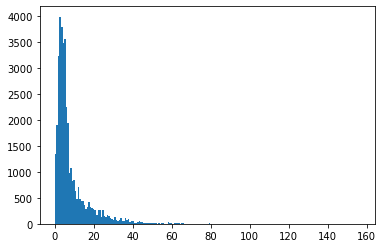

In [20]:
plt.hist(fstats_tot['Mean Deff1'], histtype='stepfilled', bins=200)

In [21]:
p14_df = fstats_tot[fstats_tot['age'] == 'P14']
p35_df = fstats_tot[fstats_tot['age'] == 'P35']
p70_df = fstats_tot[fstats_tot['age'] == 'P70']

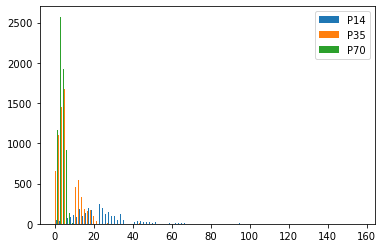

In [22]:
plt.hist([p14_df['Mean Deff1'], p35_df['Mean Deff1'], p70_df['Mean Deff1']], bins=200, label=['P14', 'P35', 'P70'])
plt.legend()

<AxesSubplot:xlabel='age', ylabel='Mean Deff1'>

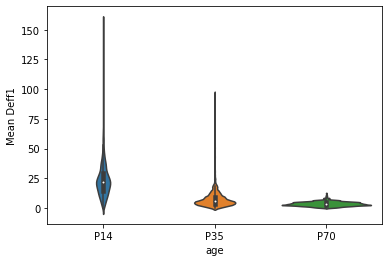

In [23]:
sns.violinplot(y='Mean Deff1', x='age', data=fstats_tot)

In [24]:
labels = np.array(ecm['age'])
features_df = ecm.drop(['age'], axis=1)

In [25]:
#the feature data needs to be scaled prior to PCA. we can do this using scikit-learn's built in scaling functions

In [26]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(features_df)
scaled_df = pd.DataFrame(scaled_df, columns = feature_list)

In [27]:
pca = PCA(n_components=6).fit(scaled_df)
print(pca.explained_variance_ratio_.sum())

0.856896708419755


Text(0, 0.5, 'Cumulative Explained Variance')

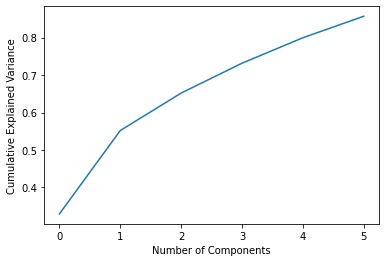

In [28]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [29]:
pca_embeddings = pca.transform(scaled_df)
pca_embeddings_df = pd.DataFrame(pca_embeddings[:, :3], columns=['Component 1', 'Component 2', 'Component 3'])
pca_embeddings_df['target'] = labels

In [30]:
pca_embeddings_df.head()

,Component 1,Component 2,Component 3,target
0,-0.767058,-3.136229,-1.062389,P14
1,6.277010,-2.197050,1.674864,P14
2,4.396212,-2.718438,-0.384827,P14
3,4.396212,-2.718438,-0.384827,P14
4,0.238700,-4.387037,-1.303008,P14


P14
P35
P70


(-15.0, 15.0)

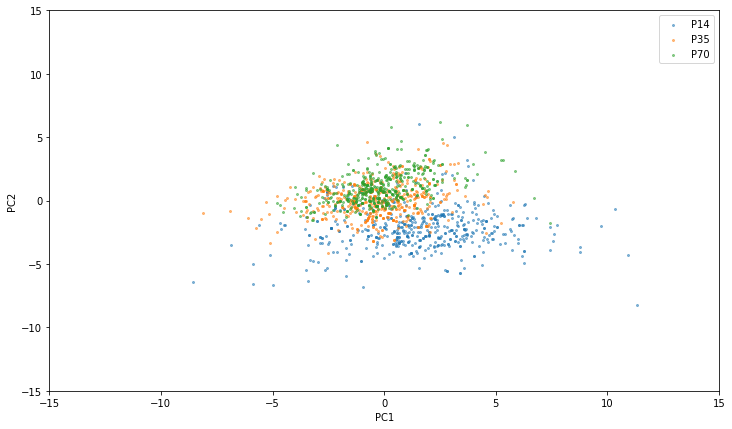

In [35]:
fig = plt.figure(figsize=(12, 7))
for unique_class in pca_embeddings_df['target'].unique():
    print(unique_class)
    df = pca_embeddings_df[pca_embeddings_df['target'] == unique_class].sample(500)
    x = df['Component 1']
    y = df['Component 2']
    plt.scatter(x, y, alpha=0.5, s=4, label=unique_class)
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.xlim([-15, 15])
plt.ylim([-15, 15])

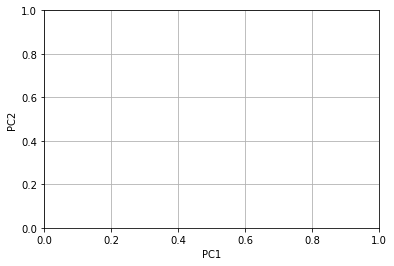

In [37]:
def bi_plot(score, coeff, labels=None, targets=None, num_points='all'):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    for uclass in np.unique(targets):
        x = (xs[targets==uclass])*scalex
        y = (ys[targets==uclass])*scaley
        if num_points == 'all':
            plt.scatter(x, y, alpha=0.5, s=1)
        else:
            inds = np.random.randint(0, len(x), num_points)
            plt.scatter(x[inds], y[inds], alpha=0.5, s=1)
    for i in range(n//2, n):
        plt.arrow(0, 0, coeff[i, 1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i, 0]*1.15, "Var"+str(i+1), color='k', ha='center', va='center')
        else:
            plt.text(coeff[i, 0], labels[i], color='k', ha='center', va='center')
plt.xlabel('PC{}'.format(1))
plt.ylabel('PC{}'.format(2))
plt.grid()


TypeError: arrow() missing 1 required positional argument: 'dy'

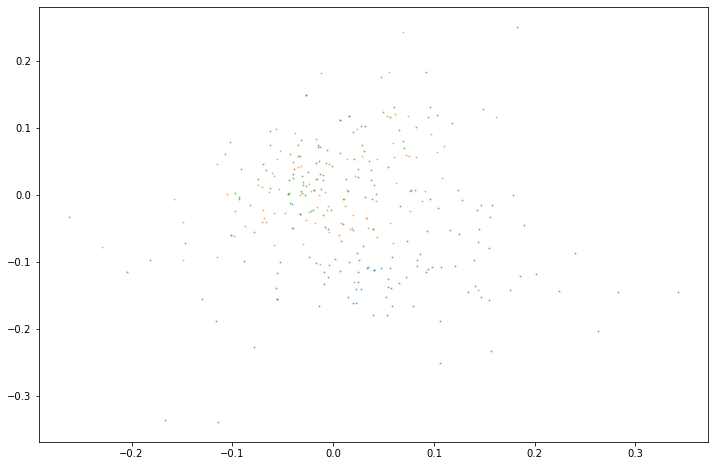

In [40]:
fig = plt.figure(figsize=(12,8))
bi_plot(pca_embeddings[:,0:2], np.transpose(pca.components_[0:2,:]), labels=feature_list, targets=labels, num_points=100)
plt.title('Bi-plot of First and Second Principal Components')